# Clustering Categorical Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Categorical.csv")
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Removing the duplicate index column from the dataset. 

In [3]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({"North America": 0, "Asia": 1, "Europe": 2, "Africa":3, "Oceania":4, "Antarctica":5, "Seven seas (open ocean)":6,"South America":7 })

## Mapping of the data

In [9]:
x = data_mapped.iloc[:, 3:4]
x

,continent
0,0
1,1
2,3
3,0
4,2
...,...
236,4
237,1
238,3
239,3


## Clustering

In [5]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [6]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 1, 3, 3, 3, 1, 2, 1, 0, 2, 0, 2, 1, 0, 3, 1, 0, 3, 0, 0,
       1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 1, 0, 0, 3, 2, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 3, 1, 0, 2, 0, 0,
       3, 3, 0, 3, 0, 2, 3, 3, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 3, 1, 1, 1,
       0, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 3, 1, 0, 3, 3, 3,
       1, 1, 0, 3, 3, 0, 2, 1, 0, 3, 0, 3, 1, 3, 1, 0, 0, 0, 1, 2, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 3, 3, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 3, 1,
       1, 3, 2, 1, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 3, 0,
       0, 1, 3, 0, 2, 3, 3, 3, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 3, 2, 1, 1, 3, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
      dtype=int32)

In [7]:
data_with_clusters = data.copy()
data_with_clusters['cluster'] = identified_clusters
data_with_clusters.head()

,name,Longitude,Latitude,continent,cluster
0,Aruba,-69.982677,12.520880,North America,1
1,Afghanistan,66.004734,33.835231,Asia,1
2,Angola,17.537368,-12.293361,Africa,0
3,Anguilla,-63.064989,18.223959,North America,1
4,Albania,20.049834,41.142450,Europe,3


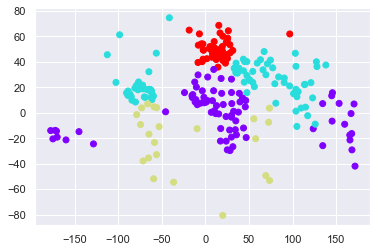

In [8]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['cluster'], cmap='rainbow')